In [1]:
get_ipython().run_line_magic('pip', 'install -U selenium')
get_ipython().run_line_magic('pip', 'install webdriver-manager')


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:


# In[2]:


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
#from selenium.common.exceptions import NoSuchElementException
#from gettext import find


In [3]:


import time


# In[3]:


options = webdriver.ChromeOptions()
options.add_argument('headless') # O mais importante, não renderiza parte gráfica
options.add_argument('window-size=1920x1080')



In [4]:

# In[27]:


driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))



In [5]:
# In[5]:


def find(driver):
    element = driver.find_element(By.TAG_NAME, 'content')
    if element:
        return element
    else:
        return False



In [6]:
# In[28]:


url_1 = 'https://ufrn.br/imprensa/noticias/filtros?text=esporte'
driver.get(url_1)
time.sleep(5)

NumPag = driver.find_elements(By.XPATH, '//*[@id="noticias-paginacao"]/li[5]/a')[0];
NumPag = int(NumPag.text)
print(NumPag)

text_to_cloud = ''



for j in range(NumPag):
    print('j: ', j) 
    
    #obtém lista de notícias (inclui 2 itens que não são notícias)
    title_news = driver.find_elements(By.CLASS_NAME, 'blue-link');
    n_news = len(title_news) #quantas notícias na página atual + 2
    print('n_news: ', n_news) #valor de fato diminuir 2
    
    #guarda todos os links de notícia da página atual
    title_news_hrefs = []
    for i in range(1, n_news):
        title_news_hrefs.append(title_news[i].get_attribute('href'))
        
    print('Conjunto de notícias desta página...')
    print('------------------------------------')
    for i in title_news_hrefs:
        print(i)
    
    print('-----Vou começar a raspagem de dados em cada notícia------')
    
    for i in range(1, len(title_news_hrefs)):
        link = title_news_hrefs[i]     
        if 'imprensa' in link:
            print(link)
            driver.get(link) #get all links  driver.get("http://www.google.com") https://selenium-python.readthedocs.io/navigating.html
            time.sleep(5)
            news_text = WebDriverWait(driver, 100).until(find)
            text_to_cloud += news_text.text
            driver.back()
            time.sleep(2)
        if i == len(title_news_hrefs) - 1: #se já leu a última notícia da página k, sinalizar para ir para k+1
            print('-------Terminei esta página, vou para a próxima página------')
            try:
                driver.find_element(By.XPATH, '//*[@id="noticias-paginacao"]/li[6]/a').click() #último elemento é o símbolo > de próxima página
                time.sleep(5)
                mudou = True
            except ex.NoSuchElementException:
                driver.refresh()
                
            
           
                    
print(text_to_cloud)

4
j:  0
n_news:  12
Conjunto de notícias desta página...
------------------------------------
https://ufrn.br/#balaoTags
https://ufrn.br/imprensa/noticias/62775/superacao-e-persistencia-destacam-a-ufrn-nos-esportes-universitarios
https://ufrn.br/imprensa/noticias/59409/projeto-realiza-atividades-de-esporte-cultura-e-lazer-em-caico
https://ufrn.br/imprensa/noticias/57884/universidade-do-esporte-estreia-na-programacao-da-tvu
https://ufrn.br/imprensa/noticias/57575/universidade-do-esporte-completa-seis-anos-de-historia
https://ufrn.br/imprensa/noticias/57423/universidade-do-esporte-e-destaque-na-transmissao-do-classico-rei
https://ufrn.br/imprensa/noticias/57202/universidade-do-esporte-abre-selecao-de-novos-membros
https://ufrn.br/imprensa/noticias/56177/universidade-do-esporte-e-lider-de-audiencia-mais-uma-vez
https://ufrn.br/imprensa/noticias/52125/programa-universidade-do-esporte-retorna-a-programacao-da-fmu
https://ufrn.br/imprensa/noticias/43162/universidade-do-esporte-e-tvu-transmit

In [7]:

# In[35]:


get_ipython().system('pip install wordcloud')
from wordcloud import WordCloud, STOPWORDS


In [11]:

# In[36]:


STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'com', 'à', 'pela', 'foi', 'como', 'onde','pelo']

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
from PIL import Image



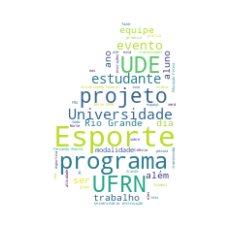

In [12]:





# In[37]:


#dataset = open("sampleWords.txt", "r").read()

def create_word_cloud(string):
   maskArray = np.array(Image.open("abacate.jpg")) #uso do numpy
   cloud = WordCloud(background_color = "white", max_font_size=500, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)

   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')
#dataset = dataset.lower()
create_word_cloud(text_to_cloud)


# In[ ]: